<h1>UN Data Exploration</h1>
## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top tly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [4]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv.csv')

In [5]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [6]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [12]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [14]:
gdp_df.value_counts('Year').sort_index

<bound method Series.sort_index of Year
2013    242
2020    242
2019    242
2018    242
2017    242
2016    242
2015    242
2014    242
2021    241
2011    240
2012    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64>

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [16]:
gdp_df.value_counts('Country').count()

242

242 Countries

In [18]:
gdp_df.value_counts('Country')

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

Kosovo,                                                
Sint Maarten (Dutch part,)                            4
Turks and Caicos Islan,ds                            12
Soma,lia                 10
Djib<br>
All have low population counts and weaker economies, leading to a lower GDP  10

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

In [21]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]

In [22]:
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [24]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

(array([110.,  59.,  23.,  21.,  13.,   8.,   3.,   0.,   2.,   2.]),
 array([   714.06671238,  12211.00941197,  23707.95211155,  35204.89481114,
         46701.83751073,  58198.78021032,  69695.72290991,  81192.6656095 ,
         92689.60830909, 104186.55100868, 115683.49370826]),
 <BarContainer object of 10 artists>)

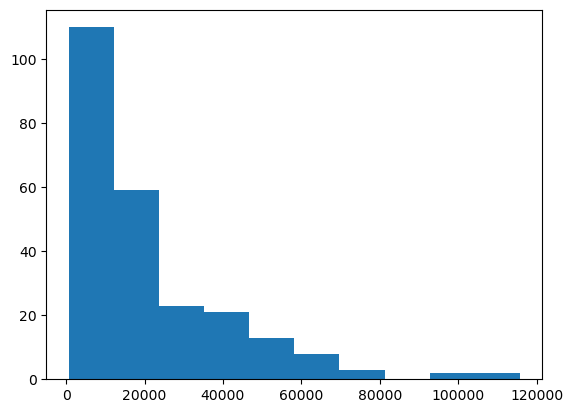

In [26]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins = 10)

The shape is very much right skewed

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [29]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515
...,...,...,...
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [31]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,NaN
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [32]:
gdp_pivoted = gdp_pivoted[(gdp_pivoted[1990] != 0) & (gdp_pivoted[2021] != 0)]

In [33]:
gdp_pivoted = gdp_pivoted.dropna(subset = [1990, 2021])

In [34]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2897.564287,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [36]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021]-gdp_pivoted[1990])/gdp_pivoted[1990]

In [37]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370,15.865334
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691,43.980435
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931,202.379544
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303,24.921232
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677,2.049878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860,0.950043
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469,406.251608
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316,75.720074


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [39]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0 ]


Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Barbados,14097.395550,13519.721406,12710.419327,12772.787194,12993.923523,13225.754385,13726.032320,14353.120119,14864.666058,14884.601843,...,15441.219761,15789.451218,16156.517559,16198.962160,16003.857426,15954.802665,13805.777541,13754.802423,15106.775175,-2.430187
Brunei,70358.724094,70439.053204,71781.102896,70154.424727,70570.964514,71966.097409,72320.987984,69660.186006,67770.172490,68366.663177,...,63131.186248,62170.087023,59980.988745,60173.051134,59650.231527,61424.364313,61603.550804,60127.023689,58669.900768,-14.542192
Burundi,1175.155086,1209.388158,1190.067435,1153.541309,1103.167298,956.490976,880.309412,867.284265,891.699844,862.006680,...,831.294839,781.579287,764.336602,750.787616,740.448223,729.658463,711.355263,714.066712,708.178317,-39.236385
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,819.192343,-30.243599
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,3210.403567,-35.406695
Dem. Rep. Congo,1750.169739,1550.763705,1346.747222,1128.593145,1034.123387,998.688314,969.808663,900.967796,865.606612,805.277881,...,999.072134,1032.571865,1021.327198,1023.539833,1048.246447,1059.892111,1044.071214,1073.643271,1132.654233,-38.654906
Fragile and conflict affected situations,4864.814075,4350.885189,4111.205699,3783.352920,3333.698724,3152.588947,3105.770527,3149.284983,3218.818872,3245.559989,...,4563.187603,4518.143936,4563.257454,4600.657232,4636.533677,4647.290257,4357.621312,4333.881033,4195.197218,-10.913738
Gabon,17559.006114,18134.816076,17109.401561,17318.162261,17497.649823,17903.782156,18091.047292,18655.653044,18825.361170,16716.372068,...,14785.398669,14892.035790,14783.078117,14478.130305,14254.461697,14478.001722,13903.288955,13814.495200,13949.155147,-21.325301
Guinea-Bissau,1998.173206,2057.174302,2020.741837,1997.076379,1998.836536,2035.223783,2224.748653,2324.843826,1641.030749,1627.075350,...,1690.091136,1748.029233,1811.300971,1872.309281,1851.886546,1890.533103,1803.630591,1831.383229,1855.111973,-8.347123


19 Countries for the 19 rows

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.


In [42]:
gdp_pivoted.sort_values('Percent_Change', ascending = False).head(2)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,936.419751,893.097341,1159.738622,1240.908573,1394.786465,1578.049440,2530.198770,6084.623075,7242.224926,8749.425868,...,28106.198389,24563.500604,21566.057048,19617.844705,17764.969630,16240.369810,15132.379974,14637.007350,14732.917816,1463.081870
China,1423.896348,1534.705272,1731.657215,1949.534268,2178.924057,2391.477116,2601.363426,2812.711135,3004.427342,3206.730026,...,11851.404218,12612.351651,13399.137320,14243.532611,15133.995618,15977.763828,16296.609379,17657.495181,18187.978737,1140.082904


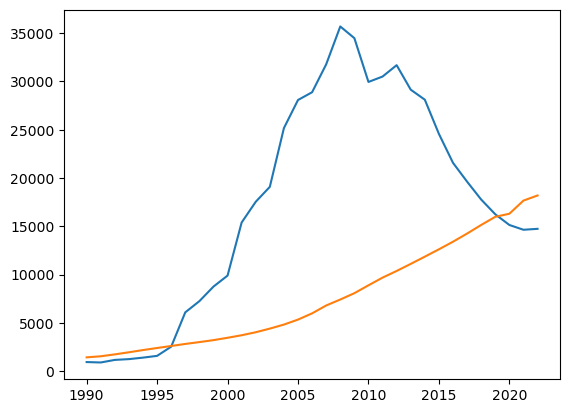

In [43]:
E_G = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']
China = gdp_df.loc[gdp_df['Country'] == 'China']
plt.plot(E_G['Year'], E_G['GDP_Per_Capita'])
plt.plot(China['Year'], China['GDP_Per_Capita'])
plt.show()

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [45]:
continents = pd.read_csv('data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [47]:
gdp_df = pd.merge(gdp_df, continents, on = 'Country', how = 'left')

In [48]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,Africa
7658,Zimbabwe,1993,2458.783255,Africa
7659,Zimbabwe,1992,2468.278257,Africa
7660,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

In [50]:
grouped_country = gdp_df.drop_duplicates('Country')
grouped_country['Continent'].value_counts()

Continent
Africa           50
Europe           44
Asia             41
North America    26
Oceania          14
South America    11
Name: count, dtype: int64

In [51]:
y_height = pd.DataFrame(grouped_country['Continent'].value_counts()).reset_index()
y_height

,Continent,count
0,Africa,50
1,Europe,44
2,Asia,41
3,North America,26
4,Oceania,14
5,South America,11


<BarContainer object of 6 artists>

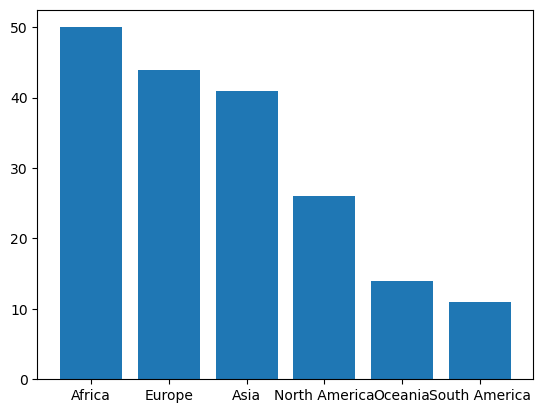

In [52]:
country_string = (gdp_df['Country']).astype(str)
plt.bar(x = y_height['Continent'], height = y_height['count'])

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

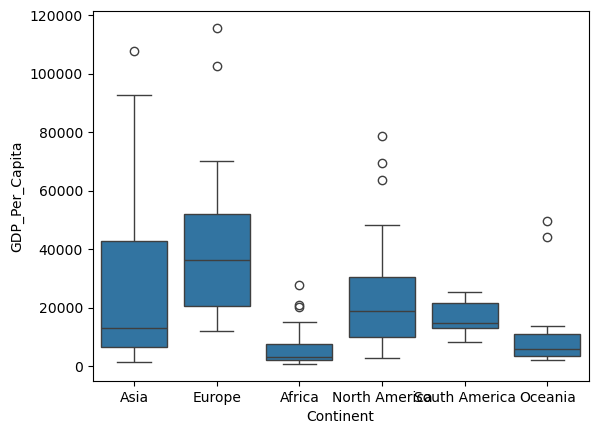

In [54]:
gdp_2021 = pd.merge(gdp_2021, continents, on = 'Country', how = 'left' )
sns.boxplot(gdp_2021, x ='Continent', y = 'GDP_Per_Capita' )


21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.


In [56]:
life_expectancy= pd.read_csv('../un-exploration-GetGubbz/data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows = 4)

In [57]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [59]:
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'], axis = 1)
life_expectancy

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN


In [60]:
year_headers = life_expectancy.columns.tolist()
year_headers = year_headers[1:]

In [61]:
life_expectancy_melted = life_expectancy.melt(id_vars = 'Country Name', value_vars = year_headers).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Life Expectancy'})
life_expectancy_melted['Year'] = life_expectancy_melted['Year'].astype(np.int64)
life_expectancy_melted

,Country,Year,Life Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


In [63]:
life_expectancy_melted.loc[life_expectancy_melted['Life Expectancy'] > 80].sort_values(by = 'Life Expectancy', ascending = True).head(1)

,Country,Year,Life Expectancy
15600,New Caledonia,2018,80.003098


24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [65]:
gdp_le = pd.merge(gdp_df, life_expectancy_melted, how = 'inner', on = ['Year', 'Country'] )
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
7052,Zimbabwe,1994,2670.106615,Africa,52.588
7053,Zimbabwe,1993,2458.783255,Africa,54.426
7054,Zimbabwe,1992,2468.278257,Africa,56.435
7055,Zimbabwe,1991,2781.787843,Africa,58.091


25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [67]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982000
21,Africa Eastern and Southern,2021,3519.174840,NaN,62.454590
54,Africa Western and Central,2021,4014.607965,NaN,56.988657
87,Albania,2021,14595.944386,Europe,76.463000
120,Algeria,2021,11029.138782,Africa,76.377000
...,...,...,...,...,...
6897,Viet Nam,2021,10628.219166,NaN,73.618000
6930,West Bank and Gaza,2021,5641.044400,Asia,73.473000
6959,World,2021,17055.357429,NaN,71.327157
6992,Zambia,2021,3236.788981,Africa,61.223000


In [68]:
gdp_le_2021[gdp_le_2021['Life Expectancy'] >= 80]

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
350,Australia,2021,49774.340702,Oceania,83.300000
383,Austria,2021,54121.145542,Europe,81.190244
581,Belgium,2021,51823.507530,Europe,81.790244
1068,Canada,2021,48218.038316,North America,81.587073
1133,Cayman Islands,2021,69400.666661,North America,82.009756
1442,Cyprus,2021,41694.257812,Europe,81.203000
1508,Denmark,2021,57962.654094,Europe,81.404878
1909,Euro area,2021,46357.187214,NaN,81.594947
2008,European Union,2021,44185.788486,NaN,80.316613
2074,Finland,2021,48713.291489,Europe,81.885366


In [69]:
len(gdp_le_2021[gdp_le_2021['Life Expectancy'] >= 80])

33

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [71]:
gdp_le_2021.sort_values('GDP_Per_Capita', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
3795,Luxembourg,2021,115683.493708,Europe,82.597561
5634,Singapore,2021,107741.118436,Asia,83.092683
2992,Ireland,2021,102785.490239,Europe,82.353659


In [72]:
three_largest = gdp_le[(gdp_le['Country'] == 'Luxembourg') | (gdp_le['Country'] == 'Singapore') | (gdp_le['Country'] == 'Ireland')]
three_largest

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2991,Ireland,2022,113870.785550,Europe,83.056098
2992,Ireland,2021,102785.490239,Europe,82.353659
2993,Ireland,2020,91356.855054,Europe,82.556098
2994,Ireland,2019,86925.906582,Europe,82.702439
2995,Ireland,2018,83575.599241,Europe,82.204878
...,...,...,...,...,...
5661,Singapore,1994,46865.416894,Asia,76.197561
5662,Singapore,1993,43528.860736,Asia,76.046341
5663,Singapore,1992,40054.049796,Asia,75.946341
5664,Singapore,1991,38705.653871,Asia,75.646341


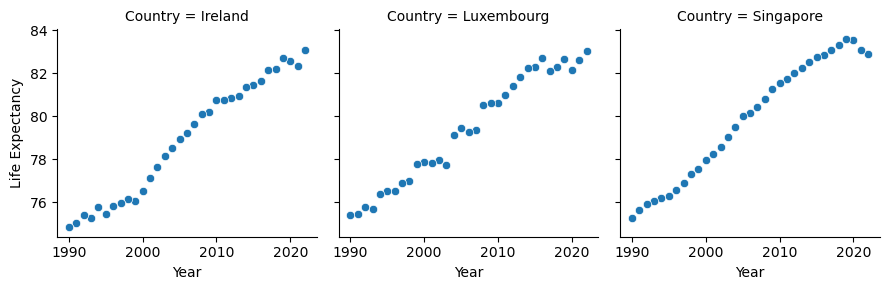

In [73]:
sns.FacetGrid(three_largest, col = 'Country').map(sns.scatterplot,'Year','Life Expectancy')

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

<Axes: xlabel='Life Expectancy', ylabel='GDP_Per_Capita'>

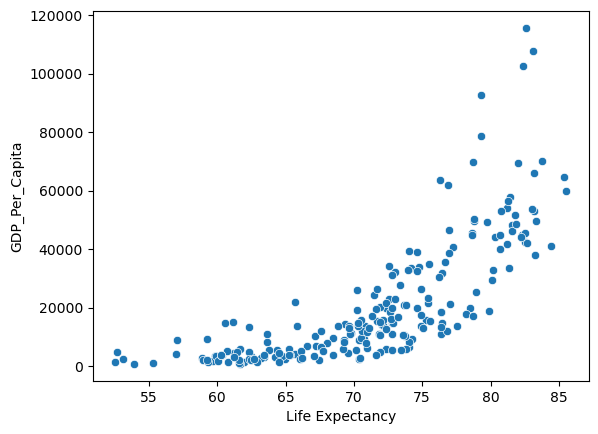

In [75]:
sns.scatterplot(gdp_le_2021, x='Life Expectancy', y='GDP_Per_Capita')

The higher the life expectancy the higher the GDP, but the graph rises exponentially so life expectancy has to increase substantially before that point.

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [78]:
gdp_le_2021[['GDP_Per_Capita', 'Life Expectancy']].corr()

,GDP_Per_Capita,Life Expectancy
GDP_Per_Capita,1.000000,0.755376
Life Expectancy,0.755376,1.000000


29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [80]:
gdp_le_2021['log_GDP_Per_Capita'] = np.log10(gdp_le_2021['GDP_Per_Capita'])

C:\Users\Gubbz\AppData\Local\Temp\ipykernel_130220\3389093056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['log_GDP_Per_Capita'] = np.log10(gdp_le_2021['GDP_Per_Capita'])


In [81]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy,log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982000,3.180990
21,Africa Eastern and Southern,2021,3519.174840,NaN,62.454590,3.546441
54,Africa Western and Central,2021,4014.607965,NaN,56.988657,3.603643
87,Albania,2021,14595.944386,Europe,76.463000,4.164232
120,Algeria,2021,11029.138782,Africa,76.377000,4.042542
...,...,...,...,...,...,...
6897,Viet Nam,2021,10628.219166,NaN,73.618000,4.026461
6930,West Bank and Gaza,2021,5641.044400,Asia,73.473000,3.751360
6959,World,2021,17055.357429,NaN,71.327157,4.231861
6992,Zambia,2021,3236.788981,Africa,61.223000,3.510114


In [82]:
gdp_le_2021[['log_GDP_Per_Capita', 'Life Expectancy']].corr()

,log_GDP_Per_Capita,Life Expectancy
log_GDP_Per_Capita,1.000000,0.857356
Life Expectancy,0.857356,1.000000


<Axes: xlabel='Life Expectancy', ylabel='log_GDP_Per_Capita'>

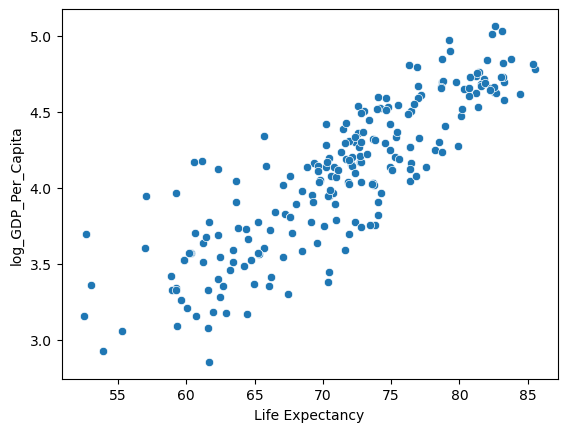

In [83]:
sns.scatterplot(gdp_le_2021, x='Life Expectancy', y='log_GDP_Per_Capita')

Life expectancy correlates better with the log of gpd_per_capita and appears to be more linear as well.

## UN Data Exploration Bonus Questions

This set of exercises is designed to give you a chance to try out some more advanced features of the pandas library.
These exercises will be using the gdp_le DataFrame that you created for the regular exercises, meaning that it will have columns for Country, Year, GDP_Per_Capita, Continent, and Life_Expectancy.

1. Let's compare the median life expectacy for each Continent across all of the years of data that we have. Perform a groupby on both Year and Continent and then aggregate using the median and save the results to a new object.  
	a. What type of object results from this?  - Its a new dataframe


In [86]:
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


In [87]:
median_le = gdp_le.groupby(['Year','Continent'])['Life Expectancy'].median()

In [88]:
median_le

Year  Continent    
1990  Africa           52.496500
      Asia             66.957000
      Europe           74.846073
      North America    70.713500
      Oceania          65.508000
                         ...    
2022  Asia             74.075000
      Europe           80.080293
      North America    74.615000
      Oceania          68.312000
      South America    73.425000
Name: Life Expectancy, Length: 198, dtype: float64

In [89]:
type(median_le)

pandas.core.series.Series

b. Look at the index of the resulting object. What do you notice about it? - Multiple Indices 

In [91]:
median_le.index

MultiIndex([(1990,        'Africa'),
            (1990,          'Asia'),
            (1990,        'Europe'),
            (1990, 'North America'),
            (1990,       'Oceania'),
            (1990, 'South America'),
            (1991,        'Africa'),
            (1991,          'Asia'),
            (1991,        'Europe'),
            (1991, 'North America'),
            ...
            (2021,        'Europe'),
            (2021, 'North America'),
            (2021,       'Oceania'),
            (2021, 'South America'),
            (2022,        'Africa'),
            (2022,          'Asia'),
            (2022,        'Europe'),
            (2022, 'North America'),
            (2022,       'Oceania'),
            (2022, 'South America')],
           names=['Year', 'Continent'], length=198)

c. Use .loc to select the median life expectancy for Asia in 2010.

In [93]:
median_le.loc[(2010, 'Asia')]

71.879

e. Use .loc to select the values for all continents for the year 2010.

In [95]:
median_le.loc[pd.IndexSlice[2010,:]]

Continent
Africa           58.365000
Asia             71.879000
Europe           78.481415
North America    74.190000
Oceania          68.030000
South America    73.711000
Name: Life Expectancy, dtype: float64

In [96]:
median_le.loc[2010]

Continent
Africa           58.365000
Asia             71.879000
Europe           78.481415
North America    74.190000
Oceania          68.030000
South America    73.711000
Name: Life Expectancy, dtype: float64

f. Use .loc to select the median life expectancy for Asia across all years. Hint: One way to do this is to use the swaplevels method.

In [98]:
median_le.loc[pd.IndexSlice[:,'Asia']]

Year
1990    66.957000
1991    67.884500
1992    68.102439
1993    67.367341
1994    67.942000
1995    68.223000
1996    68.702000
1997    69.225000
1998    69.572000
1999    70.088000
2000    70.355000
2001    69.887000
2002    70.375000
2003    70.488500
2004    69.095329
2005    71.153500
2006    71.098500
2007    71.266000
2008    71.146500
2009    69.910000
2010    71.879000
2011    72.015500
2012    72.173500
2013    72.432000
2014    72.031000
2015    73.188000
2016    73.482000
2017    73.891500
2018    73.971500
2019    74.210500
2020    73.272000
2021    72.541000
2022    74.075000
Name: Life Expectancy, dtype: float64

In [99]:
swap_median_le = median_le.swaplevel('Year', 'Continent')
swap_median_le.loc['Asia']

Year
1990    66.957000
1991    67.884500
1992    68.102439
1993    67.367341
1994    67.942000
1995    68.223000
1996    68.702000
1997    69.225000
1998    69.572000
1999    70.088000
2000    70.355000
2001    69.887000
2002    70.375000
2003    70.488500
2004    69.095329
2005    71.153500
2006    71.098500
2007    71.266000
2008    71.146500
2009    69.910000
2010    71.879000
2011    72.015500
2012    72.173500
2013    72.432000
2014    72.031000
2015    73.188000
2016    73.482000
2017    73.891500
2018    73.971500
2019    74.210500
2020    73.272000
2021    72.541000
2022    74.075000
Name: Life Expectancy, dtype: float64

2. Group gdp_le by both Year and Continent and find the min, median, and max values for both gdp per capita and life expectancy. Hint: You may want to use the [agg method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).  
	a. Look at the columns of the resulting object. What do you notice ?- Resulting columns show the min, median, and max under the sub categories we wanted to use these functions on  


In [101]:
grouped_gdp_le = gdp_le.groupby(['Year', 'Continent'])
grouped_gdp_le

In [102]:
grouped_gdp_le

In [103]:
aggregate_gdp_le = grouped_gdp_le.agg({'GDP_Per_Capita':['min','max','median'], 'Life Expectancy':['min','max','median']})
aggregate_gdp_le

GDP_Per_Capita                               \
                              min            max        median   
Year Continent                                                   
1990 Africa            460.123697   17559.006114   2199.799280   
     Asia              581.613311  105893.626059   5507.061391   
     Europe           4827.027705   70860.819124  26781.627609   
     North America    3409.794251   65961.406278   9788.684598   
     Oceania          2045.272278   31006.100227   3426.440476   
...                           ...            ...           ...   
2022 Asia             4001.699955  108036.110993  12304.948125   
     Europe          10731.440430  115541.774828  37312.101564   
     North America    2799.112561   81165.650944  15106.775175   
     Oceania          2002.718218   50997.546433   5116.335518   
     South America    8201.183799   34420.067505  15093.465117   

                   Life Expectancy                        
                               min        max     median  
Year Continent                                            
1990 Africa              41.852000  70.110000  52.496500  
     Asia                53.713000  78.837073  66.957000  
     Europe              62.352000  77.536829  74.846073  
     North America       52.975000  77.436585  70.713500  
     Oceania             59.721000  76.994634  65.508000  
...                            ...        ...        ...  
2022 Asia                66.431000  85.377000  74.075000  
     Europe              68.587927  83.453659  80.080293  
     North America       63.728000  81.571000  74.615000  
     Oceania             64.014000  83.200000  68.312000  
     South America       64.928000  79.519000  73.425000  

[198 rows x 6 columns]

b. Select the median gdp per capita value for Asia in 2010.

In [105]:
aggregate_gdp_le.index

MultiIndex([(1990,        'Africa'),
            (1990,          'Asia'),
            (1990,        'Europe'),
            (1990, 'North America'),
            (1990,       'Oceania'),
            (1990, 'South America'),
            (1991,        'Africa'),
            (1991,          'Asia'),
            (1991,        'Europe'),
            (1991, 'North America'),
            ...
            (2021,        'Europe'),
            (2021, 'North America'),
            (2021,       'Oceania'),
            (2021, 'South America'),
            (2022,        'Africa'),
            (2022,          'Asia'),
            (2022,        'Europe'),
            (2022, 'North America'),
            (2022,       'Oceania'),
            (2022, 'South America')],
           names=['Year', 'Continent'], length=198)

In [106]:
aggregate_gdp_le.loc[(2010, 'Asia')].loc[( 'GDP_Per_Capita', 'median')]

8602.903815568548

3. In this question, we'll see how the median gdp per capita has changed over time. Start by creating a Series, gdp_median_per_year by grouping by the Year variable and calculating the median gdp per capita.  
	a. Convert gdp_median_per_year to a DataFrame by using the [reset_index method](https://pandas.pydata.org/docs/reference/api/pandas.Series.reset_index.html).  


In [108]:
gdp_median_per_year = gdp_le.groupby('Year')['GDP_Per_Capita'].median().reset_index()
gdp_median_per_year

,Year,GDP_Per_Capita
0,1990,6031.458663
1,1991,6137.104479
2,1992,5730.645953
3,1993,5895.748306
4,1994,5981.199777
5,1995,6575.091505
6,1996,6921.337645
7,1997,7282.015442
8,1998,7554.925725
9,1999,7866.195639


b. The [shift method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) will allow you to compare values across rows. Use this method to create a new column showing the change in gdp per capita since the prior year.  

In [110]:
gdp_median_per_year['GDP Change from Prior Year'] = gdp_median_per_year['GDP_Per_Capita'].shift(periods = 1)
gdp_median_per_year

,Year,GDP_Per_Capita,GDP Change from Prior Year
0,1990,6031.458663,NaN
1,1991,6137.104479,6031.458663
2,1992,5730.645953,6137.104479
3,1993,5895.748306,5730.645953
4,1994,5981.199777,5895.748306
5,1995,6575.091505,5981.199777
6,1996,6921.337645,6575.091505
7,1997,7282.015442,6921.337645
8,1998,7554.925725,7282.015442
9,1999,7866.195639,7554.925725


c. How many times was there a drop in median gdp per capita from one year to the next?

In [112]:
gdp_median_per_year['Net GDP Change'] = gdp_median_per_year['GDP_Per_Capita']-gdp_median_per_year['GDP Change from Prior Year']

In [113]:
gdp_median_per_year.loc[gdp_median_per_year['Net GDP Change'] < 0]

,Year,GDP_Per_Capita,GDP Change from Prior Year,Net GDP Change
2,1992,5730.645953,6137.104479,-406.458526
11,2001,8640.302839,8702.082651,-61.779812
30,2020,13357.697064,14317.552869,-959.855805


4. Now, let's expand on the prior question to find the change in GDP from year to year for each country.  
	a. Add a new column to the gdp_le DataFrame showing the change in gdp per capita from the prior year for that country. Hint: You can combine groupby with the shift method.  


In [115]:
gdp_le = gdp_le.sort_values('Year').reset_index(drop = True)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Zimbabwe,1990,2704.757299,Africa,59.426000
1,Belize,1990,6396.500719,North America,70.744000
2,Europe & Central Asia (excluding high income),1990,15438.326235,NaN,68.296185
3,Comoros,1990,2922.712252,Africa,55.840000
4,Marshall Islands,1990,3426.440476,Oceania,62.176000
...,...,...,...,...,...
7052,Ukraine,2022,10731.440430,Europe,68.587927
7053,South Asia,2022,6716.985636,NaN,68.160933
7054,Dominican Republic,2022,19338.015112,North America,74.170000
7055,Bangladesh,2022,6263.004649,Asia,73.698000


In [116]:
gdp_le['GDP_Change_from_Prior_Year'] = gdp_le['GDP_Per_Capita'] - (gdp_le.groupby(['Country'])['GDP_Per_Capita'].shift(1))
gdp_le = gdp_le.reindex(columns = ['Country', 'Year', 'Continent', 'Life Expectancy', 'GDP_Per_Capita', 'GDP_Shifted', 'GDP_Change_from_Prior_Year'])
gdp_le.loc[gdp_le['Country'] == 'Zimbabwe']

,Country,Year,Continent,Life Expectancy,GDP_Per_Capita,GDP_Shifted,GDP_Change_from_Prior_Year
0,Zimbabwe,1990,Africa,59.426,2704.757299,NaN,NaN
341,Zimbabwe,1991,Africa,58.091,2781.787843,NaN,77.030544
460,Zimbabwe,1992,Africa,56.435,2468.278257,NaN,-313.509587
612,Zimbabwe,1993,Africa,54.426,2458.783255,NaN,-9.495002
829,Zimbabwe,1994,Africa,52.588,2670.106615,NaN,211.323360
1135,Zimbabwe,1995,Africa,50.531,2641.378271,NaN,-28.728344
1293,Zimbabwe,1996,Africa,48.955,2867.026043,NaN,225.647771
1493,Zimbabwe,1997,Africa,47.993,2896.147308,NaN,29.121265
1600,Zimbabwe,1998,Africa,46.819,2931.725144,NaN,35.577836
1977,Zimbabwe,1999,Africa,45.206,2866.032886,NaN,-65.692258


b. Which country had the largest one year increase in gdp per capita? Which had the largest one year drop in gdp per capita?

In [118]:
gdp_le.nlargest(1, 'GDP_Change_from_Prior_Year')

,Country,Year,Continent,Life Expectancy,GDP_Per_Capita,GDP_Shifted,GDP_Change_from_Prior_Year
4493,"Macao SAR, China",2011,Asia,83.229,135365.387353,NaN,21322.892045


In [119]:
gdp_le.nsmallest(1, 'GDP_Change_from_Prior_Year')

,Country,Year,Continent,Life Expectancy,GDP_Per_Capita,GDP_Shifted,GDP_Change_from_Prior_Year
6539,"Macao SAR, China",2020,Asia,85.184,55158.712729,NaN,-67663.411727


5. When looking at time series data, there can often be a large amount of observation to observation variability, making it more difficult to see general trends. This variability can be smoothed out by calculating rolling averages. We'll see how in this question.  
	a. First, filter gdp_le down to just the rows for the United States and save the result to a DataFrame named gdp_le_us.


In [121]:
gdp_le = gdp_le.drop('GDP_Shifted', axis=1)
gdp_le_us = gdp_le.loc[gdp_le['Country'] == 'United States']
gdp_le_us

,Country,Year,Continent,Life Expectancy,GDP_Per_Capita,GDP_Change_from_Prior_Year
124,United States,1990,North America,75.214634,40451.498405,NaN
232,United States,1991,North America,75.365854,39871.342964,-580.155441
476,United States,1992,North America,75.617073,40707.290631,835.947667
644,United States,1993,North America,75.419512,41279.516502,572.225871
841,United States,1994,North America,75.619512,42419.195365,1139.678863
1040,United States,1995,North America,75.621951,43042.213822,623.018457
1310,United States,1996,North America,76.026829,44149.371129,1107.157307
1518,United States,1997,North America,76.429268,45560.920145,1411.549016
1712,United States,1998,North America,76.580488,47050.995083,1490.074938
1976,United States,1999,North America,76.582927,48743.882837,1692.887754


b. Use [rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) to calculate the 3-year moving average of gdp per capita for the US.  

In [123]:
gdp_le_us['3_Year_Average_GDP'] = gdp_le_us['GDP_Per_Capita'].rolling(3).mean()

C:\Users\Gubbz\AppData\Local\Temp\ipykernel_130220\2451452664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_us['3_Year_Average_GDP'] = gdp_le_us['GDP_Per_Capita'].rolling(3).mean()


In [124]:
gdp_le_us

,Country,Year,Continent,Life Expectancy,GDP_Per_Capita,GDP_Change_from_Prior_Year,3_Year_Average_GDP
124,United States,1990,North America,75.214634,40451.498405,NaN,NaN
232,United States,1991,North America,75.365854,39871.342964,-580.155441,NaN
476,United States,1992,North America,75.617073,40707.290631,835.947667,40343.377333
644,United States,1993,North America,75.419512,41279.516502,572.225871,40619.383365
841,United States,1994,North America,75.619512,42419.195365,1139.678863,41468.667499
1040,United States,1995,North America,75.621951,43042.213822,623.018457,42246.975230
1310,United States,1996,North America,76.026829,44149.371129,1107.157307,43203.593439
1518,United States,1997,North America,76.429268,45560.920145,1411.549016,44250.835032
1712,United States,1998,North America,76.580488,47050.995083,1490.074938,45587.095452
1976,United States,1999,North America,76.582927,48743.882837,1692.887754,47118.599355


c. Plot both the original gdp per capita values and the rolling average on the same plot.

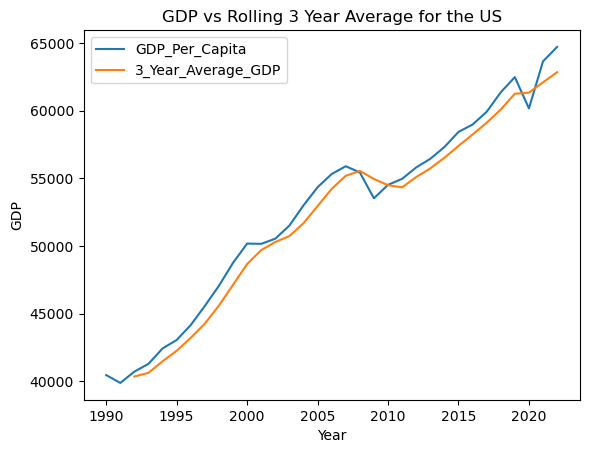

In [126]:
plt.plot('Year', 'GDP_Per_Capita', data = gdp_le_us)
plt.plot('Year', '3_Year_Average_GDP', data = gdp_le_us)
plt.title('GDP vs Rolling 3 Year Average for the US')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

6. When working with large datasets, it can sometimes pay off to be mindful of what data types you are using for each variable.  
	a. Create a new column, Continent_Category by converting the Continent column to a [category](https://pandas.pydata.org/docs/user_guide/categorical.html).  
ype.


In [128]:
gdp_le['Continent_Category'] = pd.Series(gdp_le['Continent'], dtype = 'category')
gdp_le

,Country,Year,Continent,Life Expectancy,GDP_Per_Capita,GDP_Change_from_Prior_Year,Continent_Category
0,Zimbabwe,1990,Africa,59.426000,2704.757299,NaN,Africa
1,Belize,1990,North America,70.744000,6396.500719,NaN,North America
2,Europe & Central Asia (excluding high income),1990,NaN,68.296185,15438.326235,NaN,NaN
3,Comoros,1990,Africa,55.840000,2922.712252,NaN,Africa
4,Marshall Islands,1990,Oceania,62.176000,3426.440476,NaN,Oceania
...,...,...,...,...,...,...,...
7052,Ukraine,2022,Europe,68.587927,10731.440430,-2217.885742,Europe
7053,South Asia,2022,NaN,68.160933,6716.985636,355.604907,NaN
7054,Dominican Republic,2022,North America,74.170000,19338.015112,711.936429,North America
7055,Bangladesh,2022,Asia,73.698000,6263.004649,351.991652,Asia


b. Use the memory_usage method to compare the memory used by the original Continent column compared to the category version.  

In [240]:
gdp_le['Continent'].memory_usage(deep = True)

360102

In [255]:
gdp_le['Continent_Category'].memory_usage(deep = True)

8.07 μs ± 511 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


c. You can also sometimes get speedups for groupby operations by using category datatypes. In Jupyter, if you want to estimate how long it takes to run a block of code, you can add the %%timeit magic to the top of a cell. Compare doing a groupby + aggregation on the original Continent column compared to the Continent_Category column.  

In [251]:
%%timeit

UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?


### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).


<h1>Oil Production vs GDP</h1>

Curious to find out whether oil production correlates with GDP. I am aware the United States and the Middle East are large producers of oil, but does the GDP of those areas increase/decrease or unaffected by oil production. Does Oil consumption also matter and what type

In [132]:
oil_df = pd.read_csv('../un-exploration-GetGubbz/data/UN_Oil_Data.csv')
oil_df.head()


,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Gas Oil/ Diesel Oil - Production,2022.0,"Metric tons, thousand",19.0,1.0
1,Afghanistan,Gas Oil/ Diesel Oil - Production,2021.0,"Metric tons, thousand",19.0,1.0
2,Afghanistan,Gas Oil/ Diesel Oil - Production,2020.0,"Metric tons, thousand",18.0,1.0
3,Afghanistan,Gas Oil/ Diesel Oil - Production,2019.0,"Metric tons, thousand",44.0,1.0
4,Afghanistan,Gas Oil/ Diesel Oil - Production,2018.0,"Metric tons, thousand",68.0,1.0


In [133]:
oil_df.shape

(100002, 6)

Data Manipulation:

In [135]:
oil_df = oil_df.rename(columns = {'Country or Area':'Country'})
oil_df = oil_df.drop('Quantity Footnotes', axis =1)
oil_df

,Country,Commodity - Transaction,Year,Unit,Quantity
0,Afghanistan,Gas Oil/ Diesel Oil - Production,2022.0,"Metric tons, thousand",19.0
1,Afghanistan,Gas Oil/ Diesel Oil - Production,2021.0,"Metric tons, thousand",19.0
2,Afghanistan,Gas Oil/ Diesel Oil - Production,2020.0,"Metric tons, thousand",18.0
3,Afghanistan,Gas Oil/ Diesel Oil - Production,2019.0,"Metric tons, thousand",44.0
4,Afghanistan,Gas Oil/ Diesel Oil - Production,2018.0,"Metric tons, thousand",68.0
...,...,...,...,...,...
99997,Peru,Gas Oil/ Diesel Oil - Exports,1999.0,"Metric tons, thousand",38.7
99998,Peru,Gas Oil/ Diesel Oil - Exports,1998.0,"Metric tons, thousand",45.6
99999,Peru,Gas Oil/ Diesel Oil - Exports,1997.0,"Metric tons, thousand",20.0
100000,fnSeqID,Footnote,NaN,NaN,NaN


Create a new Dataframe representing oil production

In [137]:
oil_production = oil_df.loc[oil_df['Commodity - Transaction'] == 'Gas Oil/ Diesel Oil - Production']
oil_production

,Country,Commodity - Transaction,Year,Unit,Quantity
0,Afghanistan,Gas Oil/ Diesel Oil - Production,2022.0,"Metric tons, thousand",19.0
1,Afghanistan,Gas Oil/ Diesel Oil - Production,2021.0,"Metric tons, thousand",19.0
2,Afghanistan,Gas Oil/ Diesel Oil - Production,2020.0,"Metric tons, thousand",18.0
3,Afghanistan,Gas Oil/ Diesel Oil - Production,2019.0,"Metric tons, thousand",44.0
4,Afghanistan,Gas Oil/ Diesel Oil - Production,2018.0,"Metric tons, thousand",68.0
...,...,...,...,...,...
99889,Peru,Gas Oil/ Diesel Oil - Production,1994.0,"Metric tons, thousand",1790.0
99890,Peru,Gas Oil/ Diesel Oil - Production,1993.0,"Metric tons, thousand",1793.0
99891,Peru,Gas Oil/ Diesel Oil - Production,1992.0,"Metric tons, thousand",1311.0
99892,Peru,Gas Oil/ Diesel Oil - Production,1991.0,"Metric tons, thousand",1327.0


Merge oil production dataframe with gdp dataframe

In [139]:
gdp_oil_prod = pd.merge(gdp_df, oil_production, how = 'left', on = ['Country', 'Year'], validate = 'many_to_one', indicator = True)
gdp_oil_prod

,Country,Year,GDP_Per_Capita,Continent,Commodity - Transaction,Unit,Quantity,_merge
0,Afghanistan,2021,1517.016266,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",19.0,both
1,Afghanistan,2020,1968.341002,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",18.0,both
2,Afghanistan,2019,2079.921861,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",44.0,both
3,Afghanistan,2018,2060.698973,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",68.0,both
4,Afghanistan,2017,2096.093111,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",44.0,both
...,...,...,...,...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,Africa,NaN,NaN,NaN,left_only
7658,Zimbabwe,1993,2458.783255,Africa,NaN,NaN,NaN,left_only
7659,Zimbabwe,1992,2468.278257,Africa,NaN,NaN,NaN,left_only
7660,Zimbabwe,1991,2781.787843,Africa,NaN,NaN,NaN,left_only


In [140]:
gdp_oil_prod = gdp_oil_prod.loc[gdp_oil_prod['_merge'] == 'both']
gdp_oil_prod = gdp_oil_prod.drop('_merge', axis = 1)
gdp_oil_prod

,Country,Year,GDP_Per_Capita,Continent,Commodity - Transaction,Unit,Quantity
0,Afghanistan,2021,1517.016266,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",19.0
1,Afghanistan,2020,1968.341002,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",18.0
2,Afghanistan,2019,2079.921861,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",44.0
3,Afghanistan,2018,2060.698973,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",68.0
4,Afghanistan,2017,2096.093111,Asia,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",44.0
...,...,...,...,...,...,...,...
5541,Peru,1994,5804.999328,South America,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",1790.0
5542,Peru,1993,5271.981886,South America,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",1793.0
5543,Peru,1992,5110.737420,South America,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",1311.0
5544,Peru,1991,5244.144642,South America,Gas Oil/ Diesel Oil - Production,"Metric tons, thousand",1327.0
